In [60]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_table('../input/tf_exp.tsv')
df = df.rename(columns={'Unnamed: 0': 'Tissue'})

In [6]:
stat_res = pd.read_csv('../output/mww_ks_test/ks_test.csv')
stat_res = stat_res.rename(columns={'Unnamed: 0': 'TF'})

In [31]:
df_accept = df[df.columns[df.columns.isin(stat_res[stat_res['ks_adj_pval'] <= 1e-30]['TF'])]]
df_reject = df[df.columns[df.columns.isin(stat_res[stat_res['ks_adj_pval'] > 1e-30]['TF'])]]

In [42]:
df_reject

,SNAI2,BHLHE40,IRF4,PRDM1,SOX4,HOXA2,ERF,POU2F1,TBX21,HOXB2,...,SP2,NRL,E2F7,HOXC10,OLIG2,MAX,NFE2,NFKB1,HOXA10,TBX15
0,0.00,106.97,4.35,2.92,14.87,0.00,30.26,2.17,0.14,6.73,...,17.08,1.78,0.00,0.00,0.08,57.85,78.67,21.01,0.28,0.01
1,0.09,72.24,2.02,68.43,1.82,0.09,25.78,4.91,102.92,13.45,...,26.06,1.65,0.26,0.14,0.02,85.48,1.50,31.93,0.57,0.20
2,15.97,67.21,0.15,33.25,25.70,3.47,46.52,5.74,0.23,10.40,...,10.68,1.46,2.41,0.15,0.00,76.26,1.34,17.46,0.12,0.03
3,17.38,63.08,0.10,53.98,22.26,4.03,43.01,5.55,0.05,4.83,...,10.26,1.39,2.63,0.81,0.01,86.53,0.22,19.54,13.04,0.14
4,4.58,3.13,0.43,0.77,7.82,0.12,4.08,1.59,0.02,0.61,...,0.35,0.37,0.73,1.80,0.01,6.26,0.39,3.99,4.94,10.12
5,4.63,6.07,0.28,1.16,7.19,0.65,3.56,1.37,0.04,1.17,...,0.47,0.56,0.61,0.02,0.00,6.63,0.47,4.37,4.54,13.58
6,0.00,28.21,0.59,0.64,64.17,0.70,24.78,5.20,0.20,14.52,...,9.56,1.32,0.34,0.00,0.00,80.96,148.43,24.75,23.20,0.05
7,1.57,5.68,0.01,0.15,1.55,0.00,1.74,2.16,0.00,0.54,...,0.60,0.33,0.31,0.01,0.00,7.21,0.65,4.79,1.00,0.09
8,2.82,7.53,0.19,0.23,8.99,1.12,4.55,2.51,0.03,1.15,...,0.56,0.42,0.68,0.02,7.53,10.27,1.01,3.45,0.04,5.53
9,57.87,20.84,0.00,2.64,4.42,1.38,34.44,0.86,0.00,25.92,...,8.67,0.57,4.05,0.00,0.01,44.21,0.12,10.95,0.07,0.00


In [40]:
df_accept_norm = df_accept.div(df_accept.max(axis=0), axis=1)
df_reject_norm = df_reject.div(df_reject.max(axis=0), axis=1)

In [52]:
tau_accept = df_accept_norm.apply(lambda x: 1 - x).apply(np.sum).apply(lambda x: x / (len(df['Tissue'])- 1))
tau_reject = df_reject_norm.apply(lambda x: 1 - x).apply(np.sum).apply(lambda x: x / (len(df['Tissue'])- 1))

In [67]:
sns.set_style("darkgrid")

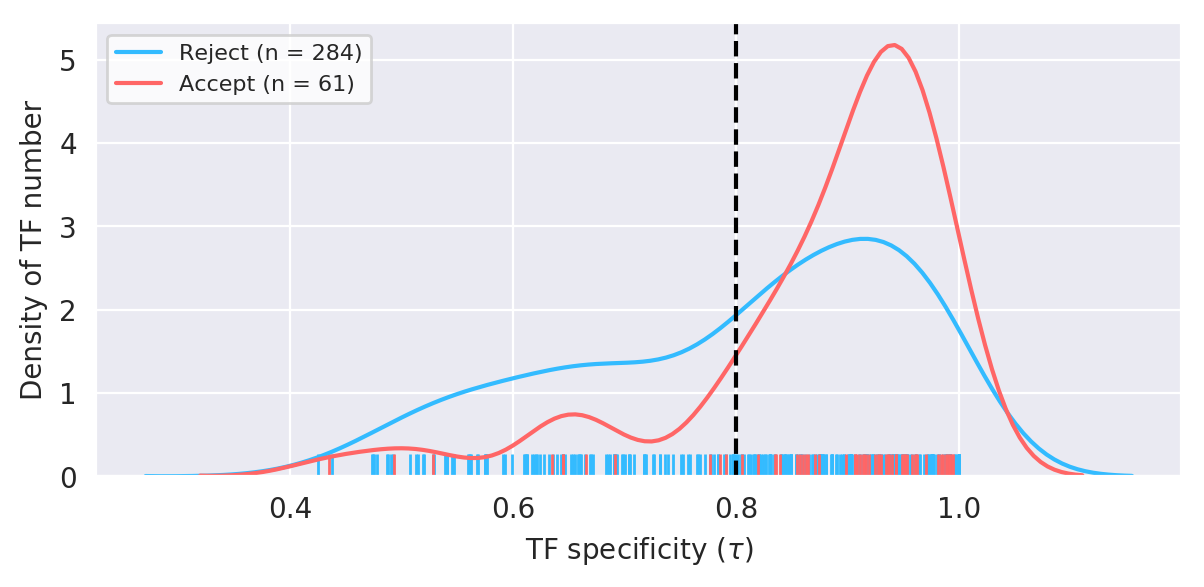

In [114]:
fig = plt.figure(figsize=(7.0, 3.0), dpi=200)
ax = sns.distplot(tau_reject, rug=True, hist=False, color='#33BBFF', label='Reject (n = {})'.format(len(tau_reject)))
ax = sns.distplot(tau_accept, rug=True, hist=False, color='#FF6666', label='Accept (n = {})'.format(len(tau_accept)))
ax.set_xlabel(r'TF specificity ${(\tau)}$', fontsize=10)
ax.set_ylabel(r'Density of TF number', fontsize=10)
ax.axvline(0.8, linestyle='--', color='k')
plt.legend(loc='upper left', facecolor='white', fontsize=8)